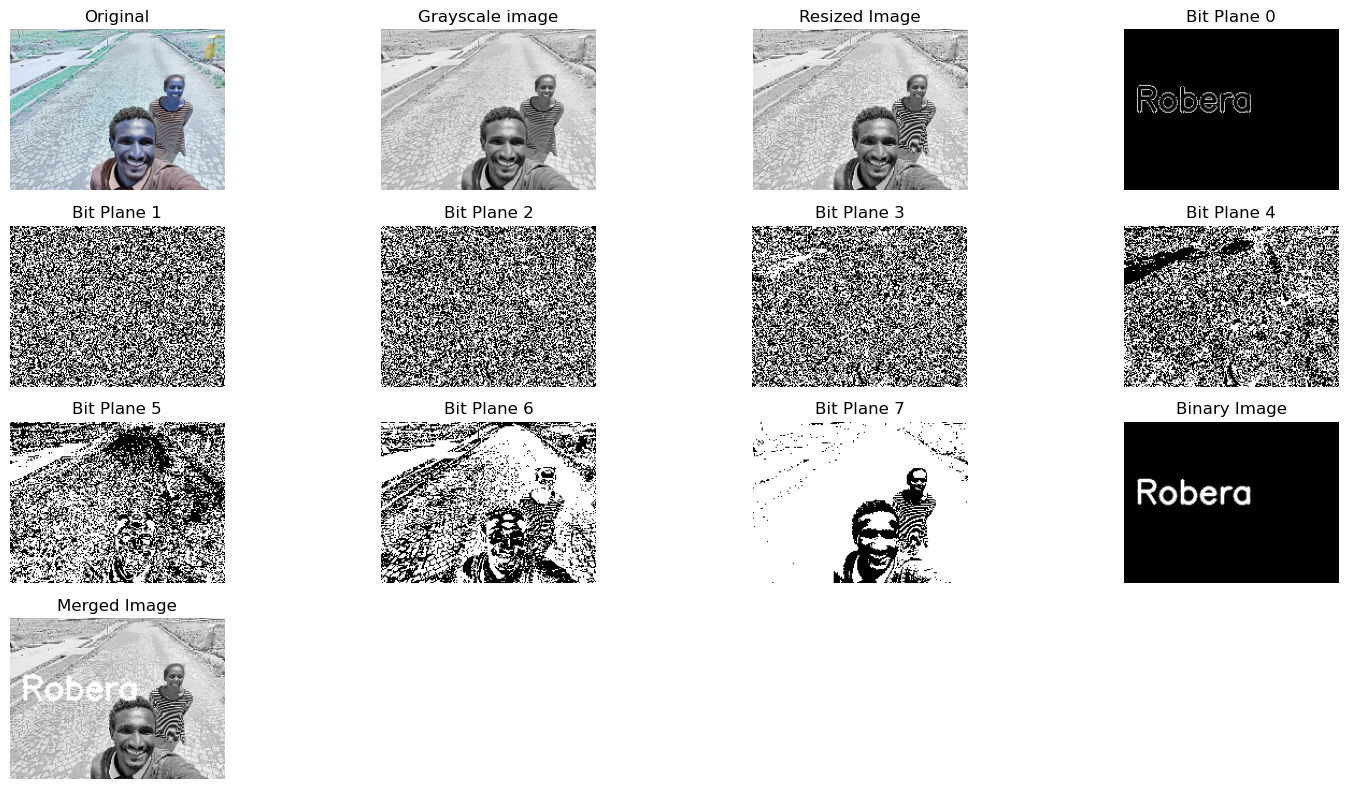

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, titles):
    num_images = len(images)
    num_rows = (num_images - 1) // 4 + 1
    num_cols = min(num_images, 4)  # maximum of four columns
    plt.figure(figsize=(15, 8))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(num_rows, num_cols, i + 1)
        if len(image.shape) == 2:  # Grayscale image
            plt.imshow(image, cmap='gray', vmin=0, vmax=255)
        else:  # RGB image
            plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Step 1: Read the image
image = cv2.imread('robii.jpg')
# Step 2: Convert it to a grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Step 3: Resize the image to width of 200 pixels, maintaining aspect ratio
width = 200
height = int((width / gray_image.shape[1]) * gray_image.shape[0])
resized_image = cv2.resize(gray_image, (width, height))
# Step 4: Separate the bit planes
bit_planes = []
for i in range(8):
    bit_plane = (resized_image >> i) & 1
    bit_planes.append(bit_plane * 255)  # Scale to displayable format (0 or 255)

# Step 5: Create a new binary (black and white) image with text
binary_image = np.zeros((height, width), dtype=np.uint8)*0
binary_image = cv2.putText(binary_image, 'Robera  ', (10, height // 2), 
                           cv2.FONT_HERSHEY_SIMPLEX, 1, 255, 2, cv2.LINE_AA)

# Step 6: Replace the least significant bit plane with the one created in step 5
bit_planes[0] = binary_image*255

# Step 7: Merge the bit planes
merged_image = np.zeros_like(resized_image)
for i in range(8):
    merged_image |= (bit_planes[i] << i)*255

# Step 8: Display all the images
titles = ['Original', 'Grayscale image', 'Resized Image'] + [f'Bit Plane {i}' for i in range(8)] + ['Binary Image', 'Merged Image']
images = [image, gray_image, resized_image] + bit_planes + [binary_image, merged_image]
display_images(images, titles)
